# 5. Review of Weeks 1 - 4

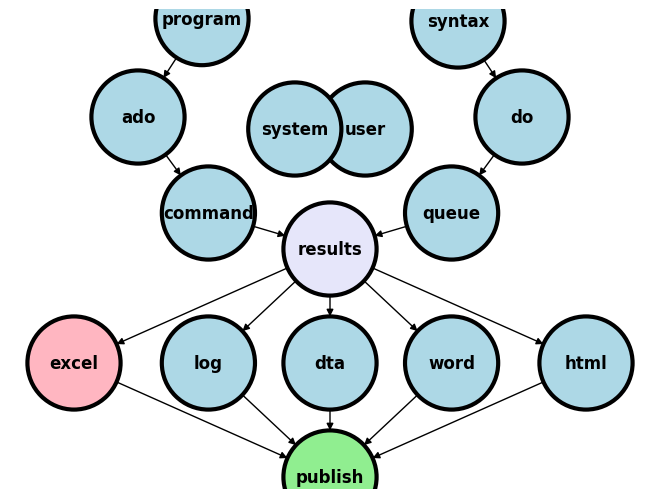

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_node("user", pos=(550, 500))
G.add_node("system", pos=(-550, 500))
G.add_node("program", pos=(-2000, 960))
G.add_node("syntax", pos=(2000, 950))
G.add_node("ado", pos=(-3000, 550))
G.add_node("do", pos=(3000, 550))
G.add_node("command", pos=(-1900, 150))
G.add_node("queue", pos=(1900, 150))
G.add_node("results", pos=(0, 0))
G.add_node("dta", pos=(0, -475))
G.add_node("log", pos=(-1900, -475))
G.add_node("excel", pos=(-4000, -475))
G.add_node("word", pos=(1900, -475))
G.add_node("html", pos=(4000, -475))
G.add_node("publish", pos=(0, -950))
G.add_edges_from([("program", "ado"), ("syntax", "do")])
G.add_edges_from([("ado", "command"), ("do", "queue")])
G.add_edges_from([("command", "results"), ("queue", "results"), ("results", "excel"), ("results", "word"), ("results", "html")])
G.add_edges_from([("results", "dta"), ("results", "log")])
G.add_edges_from([("dta", "publish"), ("log", "publish"), ("excel", "publish"), ("word", "publish"), ("html", "publish")])

pos = nx.get_node_attributes(G, 'pos')
node_colors = ["lightblue" if node not in ["results", "excel", "publish"] else "lightpink" if node == "excel" else "lavender" if node == "results" else "lightgreen" for node in G.nodes()]

nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=4500, node_color=node_colors, linewidths=3)
ax = plt.gca()
ax.collections[0].set_edgecolor("#000000")  # Set edge color to black for better contrast
ax.set_xlim([-5000, 5000])
ax.set_ylim([-1000, 1000])
plt.show()

<Details>

   <Summary> </Summary>

```stata
qui {
	
	if 0 { //background: ph340.600.01, 04/21/2023-04/22/2023
	
	    0. inspired by ~/applications/stata/ado/base/s/stcox.ado
	    1. lookout for a blank noi di ""  + other innovations!
		2. output not exactly as required or instructed for hw1
		3. spot the subtle differences + their role in aesthetics...
		4. parisimony & legibility, all steeped in tradition
		5. will require next years' class to do it this way :)
		
	}
	
	if 1 { //methods: macros, logfile, settings
	    cls
		noi di "What is your work directory?" _request(workdir)
		if "$workdir" == "" {
			di as err "No working directory provided. Exiting."
			exit 340600
		}
		else {
			cd "$workdir"
		} 
		noi di "Is hw1.txt file in your work directory (yes/no)" _request(confirm)
		if "$confirm" == "no" {
			di as err "Please download at https://github.com/jhustata/basic/raw/main/hw1.txt and rerun program"
		    exit 340700
		}
		else {
			global data "hw1.txt"
			capture confirm file "$data"
			if _rc == 0 {
				noi di "hw1.txt file in your work directory is confirmed!"
				noi di ""
				noi di ""
				noi di ""
				noi di ""
				noi di ""
				noi di ""
			}
			else {
				di as err "It appears that hw1.txt is not in your work directory"
				exit 340800
			}
		}
		
		capture log close 
		log using "${workdir}hw1.lastname.firstname.log", replace
		set more off
		
	}
	
	if 2 { //results: data, shape, etc.
		

		if 00 { //stata dropdown menu
			
			1. with a mouse i selected (after trying other options)
			2. file > import > text data (delimited...)
			3. then i located hw1.txt in my `c(pwd)' 
			4. imported it and copied & pasted the syntax, edited... 
			5. from Stata's output window into this do file thus:
			
		}
		 
		import delimited "hw1.txt", clear  
				
	}
	
	if 3 { //conclusions: questions, code, output
		
		//q1
		noi di "Question 1: There are `c(N)' records in the dataset."
		noi di ""
		
		//q2
		forvalues i=1/2 {
			
			sum init_age if female==`i'-1, detail
			#delimit ;
			local m_iqr`i': di %2.0f r(p50) 
			              " [" %2.0f r(p25) 
						   "-" %2.0f r(p75) 
						   "]"
			;
			#delimit cr
		}
		
		local q2p1: di "Question 2: The median [IQR] age is `m_iqr1'"
		local q2p2: di "among males and `m_iqr2' among females."
		
		noi di "`q2p1' `q2p2'" 
		noi di ""
		
		//q3
		forvalues i=1/2 {
			
			sum prev if female==`i'-1, detail
			local perc`i': di %2.1f r(mean)*100
			
		}
		
		local q2p1: di "Question 3: `perc1'% among males and `perc2'%"
		
		noi di  "`q2p1'" /*
		    */ " among females have history of previous transplant."
		noi di ""
		
		//q4
        g htn=dx=="4=Hypertensive"
		label define htn_lab 0 "No" 1 "Yes"
		label values htn htn_lab
		noi di "Question 4:"
		noi tab htn
		noi di ""
		
		//q5
		capture program drop question5 
		program define question5 
		    
			#delimit ; //use throughout program
		    qui { ; //line 1 quietly doesn't apply inside this program 
				
		        //label variables with output in mind
		        lab var init_age "Age, median [IQR]"; 
		        local age_lab: var lab init_age;
				
				lab var prev "Previous transplant, %" ; 
				local prev_lab: var lab prev; 
		
		        forvalues i=1/2 { ; //columns 1 & 2
			
			        count if !missing(dx) & female==`i'-1;
			
			        //row1
			        count if female==`i'-1;
			        local female`i'_N=r(N); 
	     		    local row1: di "Question 5" 
					      _col(30) "Males (N=`female1_N')" 
						  _col(50) "Females (N=`female2_N')"
					;
		    	    //row2
			        sum init_age if female==`i'-1, 
					    detail; //copy&paste from q2, edit
					
			        local m_iqr`i': di %2.0f r(p50) 
					              " [" %2.0f r(p25) 
								   "-" %2.0f r(p75) 
								   "]"  
			        ;
		            local row2: di "`age_lab'"  
					      _col(30) "`m_iqr1'"              
						  _col(50) "`m_iqr2'"

			        ;
					//row3
					sum prev if female==`i'-1 ;
					local per_prev`i': di %2.1f r(mean)*100 ;
					local row3: di "`prev_lab'"
					      _col(30) "`per_prev1'"
						  _col(50) "`per_prev2'"
					;
		        } ;

			    //rows4_13
		        split dx, p("=") ; //from chapter: delimit
		        destring dx1, replace ; 
		        lab var dx1 "Cause of ESRD, %" ;
 		 
		        local varlab: var lab dx1 ;
		
		        label def varlab
		            1 "Glomerular"
			        2 "Diabetes"
			        3 "PKD"
			        4 "Hypertensive"
			        5 "Renovascular"
			        6 "Congenital"
			        7 "Tubulo"
			        8 "Neoplasm"
			        9 "Other"
		        ;

		        lab values dx1 varlab;
				local row4: di "`varlab'"  ;
	     	    local vallab: value label dx1 
				 ; //debug: chatGPT moved this from line 144 to 159!!!
				 
				 forvalues i=1/2 { ; //columns 1 & 2
				
				    levelsof dx1 if female==`i'-1, 
					    local(diagnosis) ; //variable-level
			        global N_`i'=r(N) ;
					
		            local row=5 ; //based on Q5. template
				
			        foreach l of numlist `diagnosis' { ;
			
			            local dxcat: lab `vallab' `l' ; //alliterative
			            sum dx1 if dx1==`l' & female==(`i'-1) ;
			            local col_`i'_`row': di %2.1f r(N)*100/${N_`i'} ;
					
					    //indent the lab `dxcat' 
		                local row`row': di "    `dxcat'" 
						          _col(30) "`col_1_`row''" 
								  _col(50) "`col_2_`row''" 
								  ;
		                local row = `row' + 1 ; //tracks rows 5-13

		            } ;
			
		         } ;
				
			     forvalues i=1/13 { ; //rows1-13
				 	
					noi di "`row`i''";  
					
				 } ;
				 
      
	        } ; 
	   
	    #delimit cr
	    end 
		
		noi question5
		
		//q6
		
		logistic received_kt init_age female
		matrix define m=r(table)
		
		//row1 
		noi di ""
		noi di "Question 6"
		
		//row2 
		local row2: di "Variable" _col(30) "OR" _col(35) "(95% CI)"
		noi di "`row2'"
		
		//rows3-4
		lab var init_age "Age"
		local age_lab: var lab init_age 
		
		lab var female "Female"
		local female_lab: var lab female 
		
		local row=3
		local col=1
		foreach v of varlist init_age female {
			
			local `v'_lab: var lab `v'
			
			#delimit ;
			local row`col': di "``v'_lab'" %3.2f _col(30) m[1,`col'] 
			                               %3.2f _col(35) 
									   "(" %3.2f          m[5,`col'] 
									   "-" %3.2f          m[6,`col'] 
									   ")"
			;
			#delimit cr
			//noi di "`row`num''"
			
			local row=`row' + 1
			local col=`col' + 1

		}
		
		noi di "`row1'"
		noi di "`row2'"
		noi di ""
		
		//q7	
		local q7p1: /*
		    */di "Question 7: This regression included `e(N)' observations"
			
		local q7p2: /*
		    */di "whereas the study dataset has `c(N)' observations in total."
			
		noi di "`q7p1' `q7p2'"
		noi di ""
		
		//q8
		local q8p1: di "Question 8: I estimate that it took me 24 hours"
		noi di "`q8p1' to complete this assignment." 
		noi di ""
		
	}
			
	log close
	
}
```   

</Details>

```stata
do https://github.com/jhustata/basic/raw/main/review.do
```

## 5.1 `quietly`

```stata
qui {
    //code
}
```

## 5.2 `if 0`

```stata
if 0 {
    - Annotation
    - Non-Stata syntax
    - Really, anything
}
```

## 5.3 `//`, `*`

### Avant-garde
```stata
if 0 { //Background
    - Annotation
    - Non-Stata syntax
    - Really, anything
}
```

### Traditional

```stata
/*
Background:
- Annotation
- Non-stata syntax
- Really, anything!
*/

```

## 5.3 `display`

```stata
qui {
    noi di "What is your work directory?" _request(workdir)
}
```

I['](https://www.stata.com/manuals14/pdisplay.pdf)m going to use a relative path for this example: `~/downloads`

## 5.4 `log using`

Inspect the `.log` file created by your script

## 5.5 `if 3` -> `if 0`

## 5.6 Lab 

Please use [this](lab5.md) lab to review weeks 1 - 5 at your own pace.

## 5.7 Homework  

Answer [these](hw5.md) questions, which incorporate elements learned in weeks 1 - 5.
